#Correlações

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
# CSV pra df
dfTemperatura = pd.read_csv('average_temp_brazil.csv')
dfPobresa = pd.read_csv('poverty_brazil.csv')

In [13]:
display(dfTemperatura)

,UF,media,ano
0,RS,21.39,2000
1,RJ,23.14,2000
2,AM,27.29,2000
3,BA,26.32,2000
4,DF,21.57,2000
...,...,...,...
504,SP,25.47,2021
505,PR,22.93,2021
506,RS,23.74,2021
507,AC,25.84,2021


In [14]:
display(dfPobresa)

,Entity,Code,Year,$30.00 per day - share of population below poverty line
0,Brazil,BRA,1981,95.43703
1,Brazil,BRA,1982,95.25327
2,Brazil,BRA,1983,96.44305
3,Brazil,BRA,1984,96.47027
4,Brazil,BRA,1985,96.31982
5,Brazil,BRA,1986,90.60857
6,Brazil,BRA,1987,93.39577
7,Brazil,BRA,1988,93.31750
8,Brazil,BRA,1989,91.78148
9,Brazil,BRA,1990,94.19761


In [49]:
#Troca de nome
dfPobresa.rename(columns={'Year': 'ano'}, inplace=True)

Text(0.5, 1.0, 'Linha da pobreza por ano')

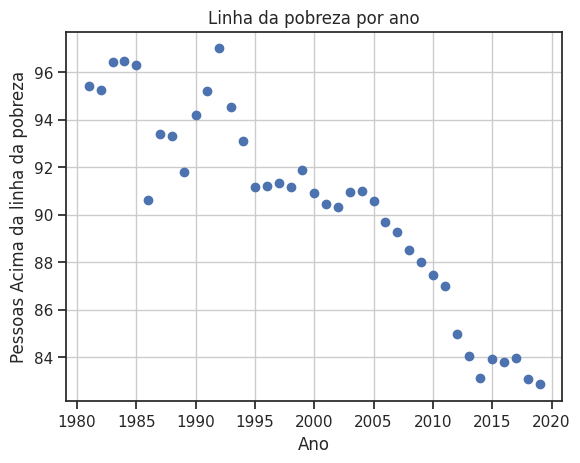

In [56]:
#Plot do gráfico do df sobre a cantidade de pessoas fora da linha da pobreza
plt.scatter(dfPobresa['ano'], dfPobresa['$30.00 per day - share of population below poverty line'])
plt.grid(True)
plt.ylabel('Pessoas Acima da linha da pobreza')
plt.xlabel('Ano')
plt.title('Linha da pobreza por ano')

In [33]:
#Manipulando DF
del dfTemperatura['UF'] #Deleta coluna UF
dfTemperatura['mean'] = dfTemperatura.groupby(['ano'])['media'].transform("mean") #Cria a média de temperatura anual
dfTemperatura = dfTemperatura.drop_duplicates(subset ='ano') #Retira valores duplicados

## Normalizações

### Temperatura

In [40]:
#Interpola as df pelo mesmo ano
df_interpolado = pd.merge(dfTemperatura, dfPobresa, on='ano', how='inner')

In [41]:
display(df_interpolado)

,media,ano,mean,Entity,Code,$30.00 per day - share of population below poverty line
0,21.39,2000,23.942000,Brazil,BRA,90.91554
1,25.84,2001,23.985000,Brazil,BRA,90.43404
2,19.95,2002,24.083000,Brazil,BRA,90.34548
3,27.55,2003,24.513500,Brazil,BRA,90.94193
4,21.26,2004,24.911429,Brazil,BRA,91.01683
5,23.79,2005,24.679091,Brazil,BRA,90.59823
6,21.70,2006,24.838696,Brazil,BRA,89.69461
7,22.46,2007,24.824167,Brazil,BRA,89.29386
8,25.42,2008,24.557692,Brazil,BRA,88.50018
9,18.60,2009,24.726923,Brazil,BRA,88.03189


In [44]:
# Inicializar o StandardScaler
colunas_para_normalizar = ['mean', '$30.00 per day - share of population below poverty line']

# Inicializar o StandardScaler
scaler = StandardScaler()

# Aplicar Z-Score Normalization nas colunas selecionadas
df_interpolado[colunas_para_normalizar] = scaler.fit_transform(df_interpolado[colunas_para_normalizar])

# Exibir o DataFrame normalizado
display(df_interpolado)




,media,ano,mean,Entity,Code,$30.00 per day - share of population below poverty line
0,21.39,2000,-1.992349,Brazil,BRA,1.213456
1,25.84,2001,-1.891992,Brazil,BRA,1.056173
2,19.95,2002,-1.663273,Brazil,BRA,1.027244
3,27.55,2003,-0.658542,Brazil,BRA,1.222076
4,21.26,2004,0.270171,Brazil,BRA,1.246542
5,23.79,2005,-0.272074,Brazil,BRA,1.109806
6,21.70,2006,0.100422,Brazil,BRA,0.814636
7,22.46,2007,0.066513,Brazil,BRA,0.683730
8,25.42,2008,-0.555403,Brazil,BRA,0.424472
9,18.60,2009,-0.160440,Brazil,BRA,0.271504


## Correlação

In [45]:
correlacao = df_interpolado[colunas_para_normalizar].corr()
display(correlacao)

,mean,$30.00 per day - share of population below poverty line
mean,1.000000,-0.738515
$30.00 per day - share of population below poverty line,-0.738515,1.000000


Text(0.5, 1.0, 'Mapa de Calor de Correlação')

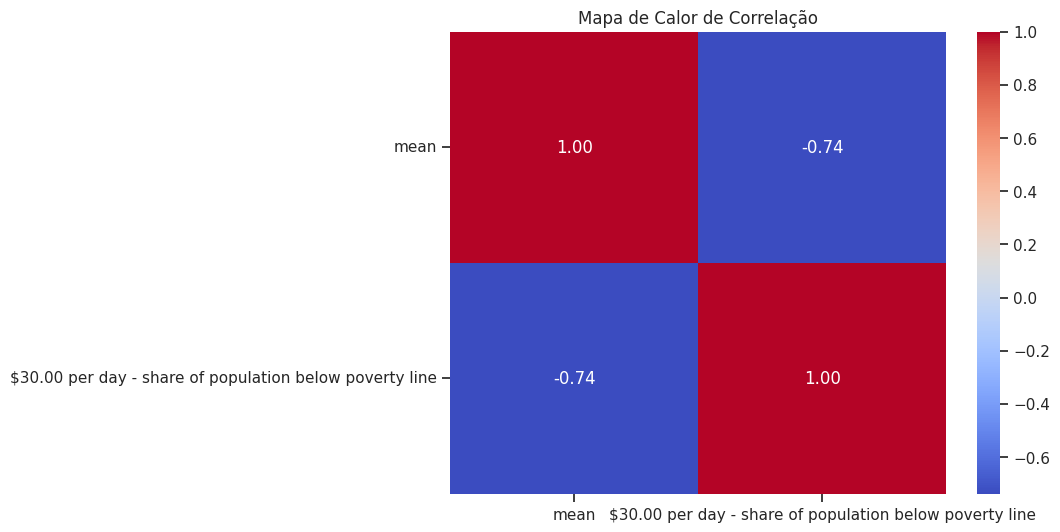

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlação')